# QuantumQuipu - Qiskit Fall Fest Latino

Reto para el Qiskit Fall Fest Latino, Escuela en Español de Computación Cuántica

Reto: Decodificar y Clasificar
Este proyecto se enfoca en codificar los archivos challenge_train.csv y challenge_test.csv en al menos dos formas diferentes en un circuito cuántico (estas podrían ser codificaciones basadas en ángulos, amplitud, kernel, aleatorias o personalizadas).

Diseña un circuito cuántico variacional para cada una de las codificaciones. Utiliza la columna "Target" como el objetivo, la cual es una clase binaria 0 y 1. Debes utilizar los datos de las columnas F1, F2, F3 y F4 para tu clasificador propuesto.

Solucion propuesta al reto:
-


 Importamos las librerias necesarias para poder trabajar con los datos y el modelo

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *


# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
#service = QiskitRuntimeService(channel="ibm_quantum")

import pandas as pd

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Scikit Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Qiskit Imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel

# Procesamiento de datos:
Primero se realiza un preprocesamiento de los datos de los dataset que se encuentran en los archivos challenge_train.csv y challenge_test.csv
Se utiliza librerias de panda para seleccionar los features F1-F2-F3-F4 y luego se separan los labels de los datos.
Por otro lado, se deben normalizar todos los datos entre -1, 1 para poder tratarlos en nuestro modelo.


In [3]:
train_X = pd.read_csv("/content/challenge_train.csv")
train_X.head()

,Unnamed: 0,F1,F2,F3,F4,Target
0,0,-0.291592,1.854606,-0.226004,1.694754,1
1,1,0.327501,1.584748,-1.300541,0.471729,1
2,2,0.227985,1.512023,-0.646984,-0.743707,1
3,3,-0.453525,1.819041,-0.870957,-1.452390,1
4,4,-1.480420,1.278968,-1.193171,-0.000952,1


Se realiza la lectura del archivo challenge_train.csv y se quitan las columnas "Unnamed: 0","Target", para quedarnos con
los features F1-F2-F3-F4.
y se visualiza el resultado.

In [5]:
sample_train = pd.read_csv("/content/challenge_train.csv")

to_drop = ["Unnamed: 0","Target"]
#to_drop = ["Unnamed: 0","Target"]

sample_train.drop(to_drop, inplace=True, axis=1)


sample_train=sample_train.to_numpy()
print(sample_train)

[[-0.29159167  1.85460625 -0.22600445  1.69475424]
 [ 0.32750058  1.58474758 -1.30054142  0.47172916]
 [ 0.22798503  1.51202301 -0.64698369 -0.74370682]
 ...
 [ 0.67806146 -1.03091865 -1.20941444  1.26961502]
 [-1.02709295  0.51535294  1.16909242 -1.5338886 ]
 [ 0.85671637  1.6612007   0.12964184 -0.7128217 ]]


Se realiza la lectura del archivo challenge_train.csv y se quitan las columnas "Unnamed: 0","F1","F2","F3","F4", para quedarnos con
el "Target", de los datos "Train",
y se visualiza el resultado.

In [6]:
label_train = pd.read_csv("challenge_train.csv")


to_drop = ["Unnamed: 0","F1","F2","F3","F4"]

label_train.drop(to_drop, inplace=True, axis=1)


label_train=label_train.to_numpy()
label_train=label_train.flatten()
print(label_train)

[1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1
 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1
 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1
 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1
 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 0 0 0 0 

Se realiza la lectura del archivo challenge_test.csv y se quitan las columnas "Unnamed: 0","Target", para quedarnos con
los features F1-F2-F3-F4.
y se visualiza el resultado.

In [7]:
sample_test = pd.read_csv("challenge_test.csv")

to_drop = ["Unnamed: 0","Target"]
#to_drop = ["Unnamed: 0","F1","F2","F3","F4"]

sample_test.drop(to_drop, inplace=True, axis=1)


sample_test=sample_test.to_numpy()
print(sample_test)

[[ 1.86608758e+00  1.57425369e+00  1.38930042e-01 -3.51541853e-01]
 [ 8.39427083e-01 -1.06951761e+00 -4.32655334e-01 -9.64799705e-01]
 [ 5.57186509e-01 -9.21264426e-01 -3.79197949e-01 -3.02017932e-03]
 [-6.94572784e-01  1.87549473e+00  5.33210770e-01  6.59735305e-01]
 [-1.84433860e+00 -1.11609837e+00  1.07454856e+00 -1.56042978e-01]
 [ 2.45973268e+00 -1.00312958e+00  9.73319701e-01 -2.80417290e-01]
 [-1.69739105e+00 -8.85242411e-01  7.15804016e-01 -8.61774768e-01]
 [-1.78480547e+00 -9.46634648e-01  8.22761850e-02 -5.27520068e-01]
 [-4.36111043e-01  9.19132110e-01 -4.64658179e-01 -2.16959449e-01]
 [-1.19709396e+00 -1.18729744e-02 -3.33364459e-02  2.59625131e-01]
 [ 2.73330506e-01 -1.10049278e+00 -4.39109153e-01 -8.48291891e-01]
 [-2.12151177e+00 -9.12703580e-01 -8.88733543e-01 -1.40002814e+00]
 [-1.11504518e+00  9.82282486e-01  5.27288527e-01 -1.23472251e-01]
 [ 1.03174693e+00  2.18212764e+00 -1.05538381e+00 -9.07707790e-01]
 [-6.75212592e-01  1.87786035e+00  6.50069386e-01  9.58489092e

Se realiza la lectura del archivo challenge_test.csv y se quitan las columnas "Unnamed: 0","F1","F2","F3","F4", para quedarnos con
el "Target", de los datos "Test",
y se visualiza el resultado.

In [8]:
label_test= pd.read_csv("challenge_test.csv")


to_drop = ["Unnamed: 0","F1","F2","F3","F4"]

label_test.drop(to_drop, inplace=True, axis=1)


label_test=label_test.to_numpy()
label_test=label_test.flatten()
print(label_test)

[1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0
 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0]


# Ruduccion dimensional utilizando el metodo PCA:
La reducción de dimensionalidad es una tarea crítica que también se puede lograr mediante el uso de redes neuronales. Las redes neuronales se pueden utilizar para la reducción de dimensionalidad entrenando una red neuronal multicapa para reconstruir vectores de entrada de alta dimensión con una pequeña capa central. PCA es un método comúnmente utilizado en el enfoque clásico, que descubre las direcciones de mayor varianza en el conjunto de datos y representa cada punto de datos mediante sus coordenadas a lo largo de cada una de estas direcciones. Una red codificadora multicapa transforma datos de alta dimensión en un código de baja dimensión, y una red decodificadora similar recupera los datos del código, es un enfoque generalizado. Se puede utilizar una máquina de Boltzmann restringida, una red de dos capas con píxeles binarios estocásticos y detectores de características conectados mediante conexiones ponderadas simétricamente, para modelar un conjunto de vectores binarios y asignar una probabilidad a cada imagen posible a través de una función de energía.

In [9]:
# Reduce dimensions
n_dim = 4
pca = PCA(n_components=n_dim).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)



# Normalizamos los datos:

In [10]:
# Normalise
std_scale = StandardScaler().fit(sample_train)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)



# Escalamos los datos:

In [15]:
# Scale
samples = np.append(sample_train, sample_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
sample_train = minmax_scale.transform(sample_train)
sample_test = minmax_scale.transform(sample_test)



# Seleccionamos una muestra de los datos y en una proporcion de 80% Train y 20% Test

In [16]:
# Select
train_size = 500
sample_train = sample_train[:train_size]
label_train = label_train[:train_size]

test_size = 100
sample_test = sample_test[:test_size]
label_test = label_test[:test_size]

Visualizamos como quedas los datos conformados en la muestra "0" del "Train" y el "Test" junto con el "Target" correspondiente

In [17]:
print(sample_train[0], label_train[0])
print(sample_test[0], label_test[0])


[ 0.23243206  0.14444585 -0.42014426 -0.58103519] 1
[ 0.37719379 -0.09567082  0.25903516 -0.08217788] 1


Ahora realizamos un analisis de los resultados obtenidos mediante un modelo clasico utilizando librerias de machine learning "sklearn"

Modelo utilizado para este analisis Support Vector Machine (SVC)

In [18]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(sample_train, label_train)  # suppress printing the return value
#Now we check out how well our classical model performs. We will analyze the scores in the conclusion section.

train_score_c4 = svc.score(sample_train, label_train)
test_score_c4 = svc.score(sample_test, label_test)

print(f"Classical SVC on the training dataset: {train_score_c4:.3f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.3f}")

Classical SVC on the training dataset: 0.988
Classical SVC on the test dataset:     0.990


# Data Encoding:

Tomaremos los datos clásicos y los codificaremos en el espacio de estados cuánticos utilizando un mapa de características cuánticas. La elección de qué mapa de características utilizar es importante y puede depender del conjunto de datos que queramos clasificar. Aquí veremos los mapas de funciones disponibles en Qiskit, antes de seleccionar y personalizar uno para codificar nuestros datos.

# Quantum Feature map
Como sugiere el nombre, un mapa de características cuánticas $\phi(\mathbf{x})$ es un mapa del vector de características clásico $\mathbf{x}$ al estado cuántico $|\Phi(\mathbf{x}) \rangle\langle\Phi(\mathbf{x})|$. Esto se facilita aplicando la operación unitaria $\mathcal{U}_{\Phi(\mathbf{x})}$ en el estado inicial $|0\rangle^{n}$ donde _n_ es el número de qubits que se utilizan para codificar.

Los mapas de características actualmente disponibles en Qiskit ([`PauliFeatureMap`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PauliFeatureMap.html), [`ZZFeatureMap`](https://qiskit.org /documentation/stubs/qiskit.circuit.library.ZFeatureMap.html) y [`ZFeatureMap`](https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZZFeatureMap.html)) son los introducidos en [ _Havlicek y otros_. Nature **567**, 209-212 (2019)](https://www.nature.com/articles/s41586-019-0980-2), en particular, se conjetura que `ZZFeatureMap` es difícil de simular de forma clásica. y pueden implementarse como circuitos de corta profundidad en dispositivos cuánticos a corto plazo.

# Vamos a utilizar nuetro propio mapa personalizado como se muestra a continuacion:

$$\phi_S:\mathbf{x}\mapsto \Bigg\{\begin{array}{ll}
    x_i & \mbox{if}\ S=\{i\} \\
        \sin(\pi-x_i)\sin(\pi-x_j) & \mbox{if}\ S=\{i,j\}
    \end{array}$$

In [19]:
import functools
def custom_data_map_func(x):
    coeff = x[0] if len(x) == 1 else functools.reduce(lambda m, n: m * n, np.sin(np.pi - x))
    return coeff

In [20]:
map_customdatamap = PauliFeatureMap(feature_dimension=4, reps=1, paulis=['I','Z','ZZ'],
                                    data_map_func=custom_data_map_func)


In [23]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=4, reps=2,insert_barriers=True)
ansatz.decompose().draw()

┌──────────┐┌──────────┐ ░                 ░  ┌──────────┐┌───────────┐ ░ »
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├─░─────────────■───░──┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├─░─»
     ├──────────┤├──────────┤ ░           ┌─┴─┐ ░  ├──────────┤├───────────┤ ░ »
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├─░────────■──┤ X ├─░──┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├─░─»
     ├──────────┤├──────────┤ ░      ┌─┴─┐└───┘ ░ ┌┴──────────┤├───────────┤ ░ »
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├─░───■──┤ X ├──────░─┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├─░─»
     ├──────────┤├──────────┤ ░ ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤ ░ »
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├─░─┤ X ├───────────░─┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├─░─»
     └──────────┘└──────────┘ ░ └───┘           ░ └───────────┘└───────────┘ ░ »
«                     ░ ┌───────────┐┌───────────┐
«q_0: ────────────■───░─┤ Ry(θ[16]) ├┤ Rz(θ[20]) ├
«               ┌─┴─┐ ░ ├───────────┤├───────────┤
«q_1: ───────■──┤ X ├─░─┤ Ry(θ[17]) ├┤ Rz(θ[21]) ├
«          ┌─┴─┐└───┘ ░ ├───────────┤├───────────┤
«q_2: ──■──┤ X ├──────░─┤ Ry(θ[18]) ├┤ Rz(θ[22]) ├
«     ┌─┴─┐└───┘      ░ ├───────────┤├───────────┤
«q_3: ┤ X ├───────────░─┤ Ry(θ[19]) ├┤ Rz(θ[23]) ├
«     └───┘           ░ └───────────┘└───────────┘

# Optimizador:
utilizamos el Optimizador COBYLA para optimizar nuestro algoritmo

In [24]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

# Sampler
Utilizamos librerias de Qiskit primitives como el Sampler, que se utiliza para lanzar la ejucucion del circuito cuantico en el simulador de Qiskit

In [25]:
from qiskit.primitives import Sampler

sampler = Sampler()

# Funccion  callback_graph(weights, obj_func_eval):

Mediante esta funcion realizamos la ejecucion de una grafica animada que nos muestra el desarrollo en tiempo real de la ejecucion de nuestro modelo de y como va tomando muestras y alcanzando la convergencia de nuestro medelo final
    

In [26]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# Clasificador cuántico variacional (VQC)
Entrenaremos un clasificador cuántico variacional (VQC). El VQC es el clasificador más simple disponible en Qiskit Machine Learning

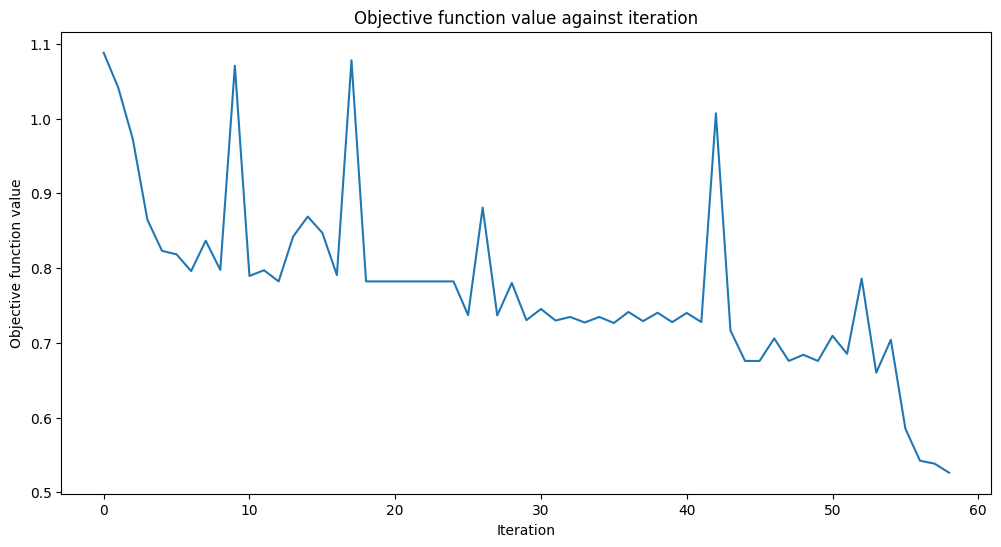

In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=map_customdatamap,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(sample_train, label_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [29]:
train_score_q4 = vqc.score(sample_train, label_train)
test_score_q4 = vqc.score(sample_test, label_test)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.95
Quantum VQC on the test dataset:     0.94
